In [6]:
# 라이브러리 추출
import pandas as pd
import numpy as np
import tensorflow as tf

In [7]:
# 메서드 정의
def main(URL = 'D:/project/Teamproject1/JeseongMoon/Dataset/binary_classification_data.csv'):
    
    # 랜덤 시드 고정
    np.random.seed(42)
    tf.random.set_seed(42)
    
    global df, LEARNING_RATE, EPOCH_COUNT, MB_SIZE, REPORT, TRAIN_RATIO, X, y, X_train, X_test, y_train, y_test, y_pred
    
    df = load_dataset(URL) # 데이터 로드
    Regression_Model() # 회귀 모델

In [8]:
df = pd.read_csv('D:/project/TeamProject1/JeseongMoon/Dataset/binary_classification_data.csv')

In [9]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [10]:
from sklearn.model_selection import train_test_split
TRAIN_RATIO = 0.8
# 학습 데이터 분리
X = df.drop('target_class', axis=1)
y = df['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_RATIO, random_state = 83)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14318, 8) (3580, 8) (14318,) (3580,)


In [11]:
X_train.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
13984,127.203125,52.269189,-0.222664,-0.101506,15.086120,54.658243,3.364636,9.392991
3126,52.968750,31.446367,3.410426,16.839254,41.168896,67.290303,1.648880,1.635625
13748,124.750000,35.676717,0.178535,1.837915,1.110368,11.973404,14.471259,246.172871
14864,100.164062,48.281689,0.561865,0.633153,1.925585,15.784724,9.617048,105.568196
17160,96.734375,46.709121,0.377105,0.152048,2.836120,18.707122,8.906146,92.142170


In [12]:
X_test.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
13971,118.890625,44.510223,0.223548,0.057119,1.369565,13.526842,14.222397,234.325537
4322,113.562500,47.418804,0.168827,-0.035996,2.205686,13.998608,10.654285,146.149662
14042,103.226562,40.028547,0.469162,0.883947,3.876254,19.969912,6.818652,54.926998
7102,123.609375,51.892352,0.288274,-0.199181,29.039298,67.633561,1.915681,1.718845
1003,134.960938,58.112418,-0.016643,-0.415690,4.735786,24.653527,6.325710,43.993983


In [13]:
X_train.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
count,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000
mean,110.979922,46.524674,0.477455,1.748246,12.444476,26.217401,8.333270,105.312684
std,25.526123,6.782110,1.052675,6.072202,29.200648,19.425697,4.491693,106.165624
min,5.812500,24.772042,-1.876011,-1.755332,0.213211,7.370432,-2.812353,-1.976976
25%,100.710938,42.362011,0.028368,-0.186510,1.917224,14.416392,5.797204,35.364865
50%,114.914062,46.954915,0.223197,0.197768,2.788880,18.415923,8.460192,83.517364
75%,127.015625,51.001216,0.476759,0.937653,5.414716,28.217723,10.721939,140.055368
max,192.617188,91.206475,8.069522,68.101622,211.948997,110.642211,34.539844,1191.000837


통합 프로필:
<br>
<br>평균: 평균 값은 대략 111으로 중앙값과 거의 비슷하며, 최소값과 최대값 사이에는 큰 차이가 있어 표준편차 값이 25.6으로 큽니다.
<br>표준 편차: 평균 표준 편차는 46.6으로 중앙값에 가깝고, 최소값과 최대값을 보면 데이터 세트 전체에 정규 분포가 나타나는 것으로 보입니다.
<br>초과 첨도: 데이터의 75% 이상이 0.5 아래에 있으며, 첨도가 낮은 경우 꼬리가 가벼우거나 이상치가 부족한 경향이 있습니다.
<br>비대칭도: 데이터의 75% 이상이 1.0 아래에 있어 통합 프로필의 대부분은 약간만 비대칭인 것으로 나타납니다.
<br>
<br>DM-SNR 곡선:
<br>
<br>평균: 표준 편차가 매우 높은 편입니다. 29로, 값의 75%가 5.6 아래에 있고 최대 값은 극단적으로 높습니다. 대부분의 곡선의 평균 값은 낮은 편이 될 것으로 기대할 수 있습니다.
<br>표준 편차: 이것도 최대 값이 매우 높아 보이며, 값의 75%가 28 아래에 있으며 중앙값은 19이고 평균은 26입니다. 평균의 높은 크기는 극단적으로 높은 값의 영향을 받은 것이지만, 해당 값들이 포함되지 않았다면 표준 편차는 중앙값 주변에 위치할 것으로 예상됩니다.
<br>초과 첨도: 값들은 상당히 높으며, 평균 값은 8.23이고 최대 값은 34입니다. 값들은 정규 분포를 나타내는 것으로 보입니다.
<br>비대칭도: 값들은 상당히 높으며, 평균 값은 102이고 최대 값은 1191으로 매우 높은 값을 가지고 있습니다. 이는 75분위 값과 비교했을 때 극도로 높은 값입니다.

In [14]:
print('For Train set')
for feature in X_train.columns:
    print('Missing values in feature ' + str(feature) + ' : ' + str(len(X_train[X_train[feature].isnull() == True])))

print('\n')
print('For Test set')
for feature in X_test.columns:
    print('Missing values in feature ' + str(feature) + ' : ' + str(len(X_test[X_test[feature].isnull() == True])))

For Train set
Missing values in feature  Mean of the integrated profile : 0
Missing values in feature  Standard deviation of the integrated profile : 0
Missing values in feature  Excess kurtosis of the integrated profile : 0
Missing values in feature  Skewness of the integrated profile : 0
Missing values in feature  Mean of the DM-SNR curve : 0
Missing values in feature  Standard deviation of the DM-SNR curve : 0
Missing values in feature  Excess kurtosis of the DM-SNR curve : 0
Missing values in feature  Skewness of the DM-SNR curve : 0


For Test set
Missing values in feature  Mean of the integrated profile : 0
Missing values in feature  Standard deviation of the integrated profile : 0
Missing values in feature  Excess kurtosis of the integrated profile : 0
Missing values in feature  Skewness of the integrated profile : 0
Missing values in feature  Mean of the DM-SNR curve : 0
Missing values in feature  Standard deviation of the DM-SNR curve : 0
Missing values in feature  Excess kurt

In [15]:
y_train.value_counts(1)

0    0.909345
1    0.090655
Name: target_class, dtype: float64

In [16]:
y_train.value_counts()

0    13020
1     1298
Name: target_class, dtype: int64

c:\Users\82105\anaconda3\envs\project1\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target_class', ylabel='count'>

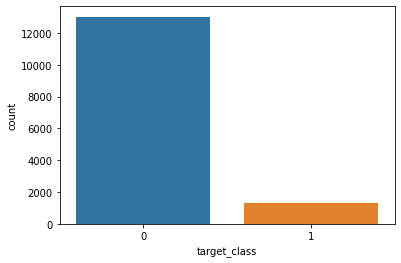

In [17]:
import seaborn as sns
sns.countplot(y_train)

<br>데이터셋은 매우 불균형합니다. 
<br>펄서가 1,153개이고 펄서가 아닌 것은 11,375개입니다. 
<br>모델 구축 과정 전에 데이터셋을 샘플링해야 할 수도 있습니다.
<br>
<br>분류 모델을 평가하기 위해 고려해야 할 가장 중요한 지표는 F1 점수와 재현율입니다. 
<br>이는 대상 클래스가 극도로 적기 때문에 중요합니다.

<AxesSubplot:>

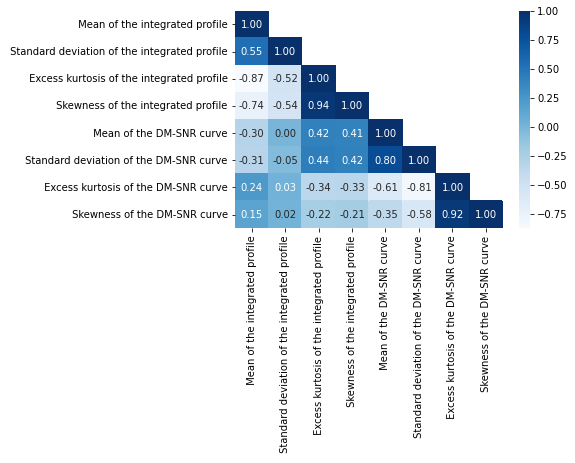

In [18]:
import matplotlib.pyplot as plt
plt.figure()
sns.heatmap(X_train.corr(), annot=True, fmt='.2f', cmap='Blues',mask=np.triu(X_train.corr(),+1))

<br>2개의 종속 변수 간의 상관 관계:
<br>
<br>높은 양의 상관 관계:
<br>
<br>편향된 통합 프로필의 왜도와 DM-SNR 곡선의 초과 첨도
<br>DM-SNR 곡선의 왜도와 DM-SNR 곡선의 초과 첨도
<br>DM-SNR 곡선의 평균과 표준 편차
<br>---------------------------------------------------
<br>높은 음의 상관 관계:
<br>
<br>통합 프로필의 평균과 통합 프로필의 초과 첨도
<br>통합 프로필의 평균과 통합 프로필의 왜도
<br>DM-SNR 곡선의 초과 첨도와 표준 편차
<br>---------------------------------------------------
<br>독립 변수와 종속 변수 간의 상관 관계:
<br>
<br>통합 프로필의 초과 첨도와 통합 프로필의 왜도는 Target_class와 높은 양의 상관 관계를 가지고 있습니다. 
<br>통합 프로필의 평균은 Target_class와 높은 음의 상관 관계를 가지고 있습니다.
<br>
<br>상관 관계는 데이터에서 다중공선성을 나타내며, 
<br>모델 구축 과정에서 바람직하지 않으므로 데이터 전처리 과정에서 처리되어야 합니다.

In [19]:
y_train_1 = y_train[y_train == 1] #creating a dataset for only true pulsars for EDA
y_train_0 = y_train[y_train == 0] #creating a dataset for only non pulsars for EDA
print(y_train_1.shape, y_train_0.shape)

(1298,) (13020,)



<br>통합 프로필:
<br>
<br>평균: 이상치가 없으며, 약간 오른쪽으로 치우친 분포입니다. 평균은 56.52이고 표준 편차는 29.81입니다.
<br>표준 편차: 이상치가 있으며, 오른쪽으로 치우친 분포입니다. 평균은 38.7이고 표준 편차는 7.87입니다.
<br>초과 첨도: 이상치가 없으며, 약간 오른쪽으로 치우친 분포입니다. 평균은 3.12이고 표준 편차는 1.87입니다.
<br>왜도: 이상치가 있으며, 오른쪽으로 치우친 분포입니다. 평균은 15.56이고 표준 편차는 14.14입니다.
<br>
<br>일반적으로 정규 분포를 따른다고 가정한다면, 펄서 별의 통합 프로필은 평균 약 56, 높은 표준 편차 약 38, 
<br>평균 왜도 약 15로 오른쪽으로 치우친 경향을 가지며, 평균 초과 첨도 약 3.12으로 
<br>매우 뾰족한 곡선과 두꺼운 꼬리를 가질 것으로 예상할 수 있습니다.

<br>DM-SNR 곡선:
<br>
<br>평균: 이상치가 매우 적게 있으며, 오른쪽으로 치우친 분포입니다. 평균은 44.91이고 표준 편차는 45.13입니다.
<br>표준 편차: 이상치가 없으며, 약간 오른쪽으로 치우친 분포입니다. 평균은 56.92이고 표준 편차는 19.73입니다.
<br>초과 첨도: 이상치가 있으며, 극단적으로 오른쪽으로 치우친 분포입니다. 평균은 2.78이고 표준 편차는 3.20입니다.
<br>왜도: 이상치가 있으며, 극단적으로 오른쪽으로 치우친 분포입니다. 평균은 17.93이고 표준 편차는 46.92입니다.
<br>
<br>일반적으로 정규 분포를 따른다고 가정한다면, 펄서 별의 DM-SNR 곡선은 평균 약 45, 높은 표준 편차 약 57, 
<br>평균 왜도 약 18로 오른쪽으로 치우친 경향을 가지며, 평균 초과 첨도 약 2.78으로 
<br>매우 뾰족한 곡선과 두꺼운 꼬리를 가질 것으로 예상할 수 있습니다.

<br>Integrated Profile (통합 프로필):
<br>
<br>평균: 이상치가 있으며, 평균은 116.56이고 표준 편차는 17.43입니다. 정규 분포에 가까운 형태입니다.
<br>표준 편차: 이상치가 있으며, 평균은 47.31이고 표준 편차는 6.15입니다. 거의 정규 분포에 가깝지만 오른쪽으로 꼬리가 있습니다.
<br>초과 첨도: 이상치가 있으며, 평균은 0.20이고 표준 편차는 0.33입니다. 양쪽 꼬리를 가진 거의 정규 분포에 가깝습니다.
<br>왜도: 이상치가 있으며, 오른쪽으로 치우친 분포입니다. 평균은 0.38이고 표준 편차는 0.98입니다.

<br>일반적으로 정규 분포를 따른다고 가정한다면, 비펄서 별의 통합 프로필은 평균 약 117, 높은 표준 편차 약 47, 
<br>왜도가 거의 없는 분포 (평균 왜도 약 0.38)를 가질 것으로 예상할 수 있으며, 약간 뾰족한 곡선을 가질 것으로 예상됩니다 (평균 초과 첨도 약 0.38).
<br>
<br>DM-SNR Curve (DM-SNR 곡선):
<br>
<br>평균: 이상치가 몇 개 있으며, 극단적으로 오른쪽으로 치우친 분포입니다. 평균은 8.90이고 표준 편차는 24.59입니다.
<br>표준 편차: 이상치가 몇 개 있으며, 오른쪽으로 치우친 분포입니다. 평균은 23.24이고 표준 편차는 16.71입니다.
<br>초과 첨도: 이상치가 있으며, 약간 오른쪽으로 치우친 분포입니다. 평균은 8.89이고 표준 편차는 4.26입니다.
<br>왜도: 이상치가 있으며, 오른쪽으로 치우친 분포입니다. 평균은 114.36이고 표준 편차는 107.81입니다.
<br>
<br>일반적으로 정규 분포를 따른다고 가정한다면, 비펄서 별의 DM-SNR 곡선은 평균 약 9, 높은 표준 편차 약 23, 
<br>오른쪽으로 치우친 분포 (평균 왜도 약 114)를 가질 것으로 예상되며, 
<br>약간 뾰족한 곡선과 두꺼운 꼬리를 가질 것으로 예상됩니다 (평균 초과 첨도 약 8.89).

In [20]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.datasets import load_iris
%matplotlib inline
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import warnings
warnings.filterwarnings(action='ignore')

In [21]:
ss=StandardScaler() 
X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

In [22]:
SVM = svm.SVC(random_state=42).fit(X_trains, y_train)

In [23]:
SVM_param_grid = {'C': [0.01,0.1, 1, 10],  
              'gamma': [0.09, 0.1, 0.2, 0.001], 
              'kernel': ['rbf'],
              'tol':[0.001,0.0001],
              'degree':[2,3]}

SVM_grid1 = GridSearchCV(SVM, param_grid = SVM_param_grid, cv = 5, n_jobs=-1)

In [24]:
SVM_grid1.fit(X_trains, y_train) 

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [2, 3],
                         'gamma': [0.09, 0.1, 0.2, 0.001], 'kernel': ['rbf'],
                         'tol': [0.001, 0.0001]})

In [25]:
SVM_grid1.best_estimator_

SVC(C=10, degree=2, gamma=0.2, random_state=42)

In [26]:
SVM_grid = svm.SVC(C=10,degree=2, gamma=0.09, kernel='rbf', random_state=1)
SVM_grid.fit(X_trains, y_train)

SVC(C=10, degree=2, gamma=0.09, random_state=1)

In [27]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, SVM_grid.predict(X_trains)),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, SVM_grid.predict(X_tests)),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.98      1.00      0.99     13020
           1       0.95      0.84      0.89      1298

    accuracy                           0.98     14318
   macro avg       0.97      0.92      0.94     14318
weighted avg       0.98      0.98      0.98     14318
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3239
           1       0.95      0.81      0.88       341

    accuracy                           0.98      3580
   macro avg       0.97      0.90      0.93      3580
weighted avg       0.98      0.98      0.98      3580
 



In [28]:
y_pred = SVM_grid.predict(X_tests)
print( "SVM best accuracy : " + str(np.round(metrics.accuracy_score(y_test,y_pred),3)))

SVM best accuracy : 0.978


In [29]:
print("Precision Score : ",precision_score(y_test, y_pred, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive',average='micro'))

Precision Score :  0.9782122905027933
Recall Score :  0.9782122905027933


In [30]:
cutoff_grid = np.linspace(0.0,1.0,100)
TPR = []                                                 
FPR = []    

In [31]:
FPR, TPR, cutoffs = metrics.roc_curve(y_test,y_pred,pos_label=1)      # positive label = 1.

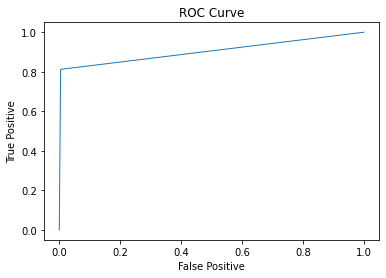

In [32]:
# 시각화
plt.plot(FPR,TPR,linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

In [33]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


# 배치정규화, 오버샘플링, elu, adamax, es, rlrp

In [34]:
from imblearn.over_sampling import SMOTE

# SMOTE를 사용하여 오버샘플링 수행
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_trains, y_train)

In [35]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
from sklearn.utils import class_weight


In [36]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='elu', input_shape=(X_trains.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='elu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='elu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adamax()
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 학습 자동 중단 설정
es = EarlyStopping(monitor='loss', patience=50, mode='min')
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=40, mode='min')

# 모델 학습
model.fit(X_train_oversampled, y_train_oversampled, epochs=300, batch_size=300, verbose=1, 
          validation_data=(X_tests, y_test), callbacks=[es, rlrp])

# 모델 평가
y_pred = model.predict(X_tests)
    
loss, accuracy = model.evaluate(X_tests, y_test, verbose=0)
print(f'Accuracy: {accuracy}\n MSE: {loss}')

Epoch 1/300
87/87 [==============================] - 1s 5ms/step - loss: 0.1800 - accuracy: 0.9369 - val_loss: 0.5444 - val_accuracy: 0.7165
Epoch 2/300
87/87 [==============================] - 0s 3ms/step - loss: 0.1484 - accuracy: 0.9488 - val_loss: 0.3549 - val_accuracy: 0.8631
Epoch 3/300
87/87 [==============================] - 0s 4ms/step - loss: 0.1438 - accuracy: 0.9510 - val_loss: 0.2341 - val_accuracy: 0.9277
Epoch 4/300
87/87 [==============================] - 0s 4ms/step - loss: 0.1421 - accuracy: 0.9500 - val_loss: 0.1944 - val_accuracy: 0.9408
Epoch 5/300
87/87 [==============================] - 0s 4ms/step - loss: 0.1393 - accuracy: 0.9502 - val_loss: 0.1436 - val_accuracy: 0.9561
Epoch 6/300
87/87 [==============================] - 0s 3ms/step - loss: 0.1392 - accuracy: 0.9508 - val_loss: 0.1533 - val_accuracy: 0.9536
Epoch 7/300
87/87 [==============================] - 0s 3ms/step - loss: 0.1344 - accuracy: 0.9526 - val_loss: 0.1279 - val_accuracy: 0.9617
Epoch 8/300
8

# 배치정규화, 클래스 가중치 부여, relu, adamax, es, rlrp

In [37]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_trains.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 클래스 가중치 계산
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
class_weights = dict(enumerate(class_weights))

optimizer = tf.keras.optimizers.Adamax()
model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 학습 자동 중단 설정
es = EarlyStopping(monitor='loss', patience=50, mode='min')
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=40, mode='min')

# 모델 학습
model2.fit(X_trains, y_train, epochs=500, batch_size=32, verbose=1, 
          validation_data=(X_tests, y_test), callbacks=[es, rlrp], class_weight=class_weights)

# 모델 평가
y_pred = model2.predict(X_tests)
    
loss, accuracy = model2.evaluate(X_tests, y_test, verbose=0)
print(f'Accuracy: {accuracy}\n MSE: {loss}')

Epoch 1/500
448/448 [==============================] - 2s 2ms/step - loss: 0.2551 - accuracy: 0.9071 - val_loss: 0.2386 - val_accuracy: 0.9497
Epoch 2/500
448/448 [==============================] - 1s 2ms/step - loss: 0.1946 - accuracy: 0.9496 - val_loss: 0.1789 - val_accuracy: 0.9592
Epoch 3/500
448/448 [==============================] - 1s 2ms/step - loss: 0.1742 - accuracy: 0.9577 - val_loss: 0.1609 - val_accuracy: 0.9592
Epoch 4/500
448/448 [==============================] - 1s 2ms/step - loss: 0.1664 - accuracy: 0.9603 - val_loss: 0.1327 - val_accuracy: 0.9690
Epoch 5/500
448/448 [==============================] - 1s 2ms/step - loss: 0.1602 - accuracy: 0.9647 - val_loss: 0.1374 - val_accuracy: 0.9654
Epoch 6/500
448/448 [==============================] - 1s 2ms/step - loss: 0.1588 - accuracy: 0.9649 - val_loss: 0.1334 - val_accuracy: 0.9654
Epoch 7/500
448/448 [==============================] - 1s 2ms/step - loss: 0.1518 - accuracy: 0.9640 - val_loss: 0.1354 - val_accuracy: 0.9651

# 배치정규화, relu, adamax

In [38]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_trains.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adamax()
model3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
model3.fit(X_trains, y_train, epochs=500, batch_size=32, verbose=1, 
          validation_data=(X_tests, y_test))

# 모델 평가
y_pred = model3.predict(X_tests)
    
loss, accuracy = model3.evaluate(X_tests, y_test, verbose=0)
print(f'Accuracy: {accuracy}\n MSE: {loss}')

Epoch 1/500
448/448 [==============================] - 2s 2ms/step - loss: 0.2318 - accuracy: 0.9574 - val_loss: 0.1031 - val_accuracy: 0.9788
Epoch 2/500
448/448 [==============================] - 1s 1ms/step - loss: 0.1073 - accuracy: 0.9763 - val_loss: 0.0789 - val_accuracy: 0.9768
Epoch 3/500
448/448 [==============================] - 1s 1ms/step - loss: 0.0874 - accuracy: 0.9773 - val_loss: 0.0728 - val_accuracy: 0.9779
Epoch 4/500
448/448 [==============================] - 1s 1ms/step - loss: 0.0750 - accuracy: 0.9793 - val_loss: 0.0732 - val_accuracy: 0.9793
Epoch 5/500
448/448 [==============================] - 1s 1ms/step - loss: 0.0747 - accuracy: 0.9783 - val_loss: 0.0768 - val_accuracy: 0.9785
Epoch 6/500
448/448 [==============================] - 1s 1ms/step - loss: 0.0705 - accuracy: 0.9797 - val_loss: 0.0706 - val_accuracy: 0.9793
Epoch 7/500
448/448 [==============================] - 1s 2ms/step - loss: 0.0703 - accuracy: 0.9792 - val_loss: 0.0740 - val_accuracy: 0.9782

In [40]:
from tensorflow.keras import regularizers

model9 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_trains.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),  # L1/L2 정규화 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),  # L1/L2 정규화 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)),  # L1/L2 정규화 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adamax()
model9.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 학습 자동 중단 설정
es = EarlyStopping(monitor='val_loss', patience=50, mode='min')
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=40, mode='min')

# 모델 학습
model9.fit(X_trains, y_train, epochs=500, batch_size=32, verbose=1, 
          validation_data=(X_tests, y_test), callbacks=[es, rlrp])

# 모델 평가
y_pred = model9.predict(X_tests)
    
loss, accuracy = model9.evaluate(X_tests, y_test, verbose=0)
print(f'Accuracy: {accuracy}\n MSE: {loss}')

Epoch 1/500
448/448 [==============================] - 2s 2ms/step - loss: 15.4434 - accuracy: 0.8892 - val_loss: 6.5679 - val_accuracy: 0.9575
Epoch 2/500
448/448 [==============================] - 1s 2ms/step - loss: 4.0537 - accuracy: 0.9609 - val_loss: 2.4679 - val_accuracy: 0.9645
Epoch 3/500
448/448 [==============================] - 1s 2ms/step - loss: 1.7779 - accuracy: 0.9649 - val_loss: 1.2675 - val_accuracy: 0.9656
Epoch 4/500
448/448 [==============================] - 1s 2ms/step - loss: 0.9972 - accuracy: 0.9654 - val_loss: 0.7429 - val_accuracy: 0.9740
Epoch 5/500
448/448 [==============================] - 1s 2ms/step - loss: 0.6501 - accuracy: 0.9651 - val_loss: 0.5038 - val_accuracy: 0.9749
Epoch 6/500
448/448 [==============================] - 1s 2ms/step - loss: 0.4412 - accuracy: 0.9687 - val_loss: 0.3675 - val_accuracy: 0.9757
Epoch 7/500
448/448 [==============================] - 1s 2ms/step - loss: 0.3209 - accuracy: 0.9695 - val_loss: 0.2580 - val_accuracy: 0.978

KeyboardInterrupt: 

In [45]:
model10 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_trains.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.001),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.001),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.001),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.001),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.001),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.001),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adamax()
model10.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 학습 자동 중단 설정
rlrp = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=40, mode='min')

# 모델 학습
model10.fit(X_trains, y_train, epochs=100, batch_size=10, verbose=1, validation_data=(X_tests, y_test), callbacks=[rlrp])

# 모델 평가
y_pred = model9.predict(X_tests)
    
loss, accuracy = model9.evaluate(X_tests, y_test, verbose=0)
print(f'Accuracy: {accuracy}\n MSE: {loss}')

Epoch 1/100
1432/1432 [==============================] - 5s 3ms/step - loss: 7.1820 - accuracy: 0.9435 - val_loss: 4.8532 - val_accuracy: 0.9749
Epoch 2/100
1432/1432 [==============================] - 4s 3ms/step - loss: 3.5471 - accuracy: 0.9732 - val_loss: 2.5883 - val_accuracy: 0.9785
Epoch 3/100
1432/1432 [==============================] - 4s 3ms/step - loss: 2.0488 - accuracy: 0.9757 - val_loss: 1.5871 - val_accuracy: 0.9707
Epoch 4/100
1432/1432 [==============================] - 4s 3ms/step - loss: 1.3478 - accuracy: 0.9720 - val_loss: 1.1792 - val_accuracy: 0.9601
Epoch 5/100
1432/1432 [==============================] - 4s 3ms/step - loss: 1.0037 - accuracy: 0.9730 - val_loss: 0.8589 - val_accuracy: 0.9791
Epoch 6/100
1432/1432 [==============================] - 4s 3ms/step - loss: 0.7839 - accuracy: 0.9740 - val_loss: 0.7305 - val_accuracy: 0.9623
Epoch 7/100
1432/1432 [==============================] - 4s 3ms/step - loss: 0.6355 - accuracy: 0.9739 - val_loss: 0.5896 - val_ac

In [46]:
from tensorflow.keras import regularizers

model11 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_trains.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.001),  # Dropout 추가
    tf.keras.layers.Dense(128, activation='relu'),  # L1/L2 정규화 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.001),  # Dropout 추가
    tf.keras.layers.Dense(64, activation='relu'),  # L1/L2 정규화 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),  # L1/L2 정규화 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.SGD()
model11.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 학습 자동 중단 설정
es = EarlyStopping(monitor='val_loss', patience=50, mode='min')
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=40, mode='min')

# 모델 학습
model11.fit(X_trains, y_train, epochs=500, batch_size=32, verbose=1, 
          validation_data=(X_tests, y_test), callbacks=[es, rlrp])

# 모델 평가
y_pred = model11.predict(X_tests)
    
loss, accuracy = model11.evaluate(X_tests, y_test, verbose=0)
print(f'Accuracy: {accuracy}\n MSE: {loss}')

Epoch 1/500
448/448 [==============================] - 3s 4ms/step - loss: 0.2071 - accuracy: 0.9529 - val_loss: 0.1055 - val_accuracy: 0.9765
Epoch 2/500
448/448 [==============================] - 1s 3ms/step - loss: 0.1033 - accuracy: 0.9756 - val_loss: 0.0826 - val_accuracy: 0.9771
Epoch 3/500
448/448 [==============================] - 1s 3ms/step - loss: 0.0857 - accuracy: 0.9792 - val_loss: 0.0763 - val_accuracy: 0.9777
Epoch 4/500
448/448 [==============================] - 1s 3ms/step - loss: 0.0800 - accuracy: 0.9788 - val_loss: 0.0741 - val_accuracy: 0.9791
Epoch 5/500
448/448 [==============================] - 2s 3ms/step - loss: 0.0732 - accuracy: 0.9797 - val_loss: 0.0718 - val_accuracy: 0.9785
Epoch 6/500
448/448 [==============================] - 2s 3ms/step - loss: 0.0755 - accuracy: 0.9786 - val_loss: 0.0734 - val_accuracy: 0.9785
Epoch 7/500
448/448 [==============================] - 1s 3ms/step - loss: 0.0719 - accuracy: 0.9789 - val_loss: 0.0723 - val_accuracy: 0.9802

In [47]:
from tensorflow.keras import regularizers

model11 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_trains.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.001),  # Dropout 추가
    tf.keras.layers.Dense(128, activation='relu'),  # L1/L2 정규화 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.001),  # Dropout 추가
    tf.keras.layers.Dense(64, activation='relu'),  # L1/L2 정규화 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),  # L1/L2 정규화 추가
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.SGD()
model11.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 학습 자동 중단 설정
es = EarlyStopping(monitor='val_loss', patience=50, mode='min')
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=40, mode='min')

# 모델 학습
model11.fit(X_trains, y_train, epochs=100, batch_size=5, verbose=1, 
          validation_data=(X_tests, y_test), callbacks=[es, rlrp])

# 모델 평가
y_pred = model11.predict(X_tests)
    
loss, accuracy = model11.evaluate(X_tests, y_test, verbose=0)
print(f'Accuracy: {accuracy}\n MSE: {loss}')

Epoch 1/100
2864/2864 [==============================] - 7s 2ms/step - loss: 0.1483 - accuracy: 0.9558 - val_loss: 0.0948 - val_accuracy: 0.9721
Epoch 2/100
2864/2864 [==============================] - 5s 2ms/step - loss: 0.0944 - accuracy: 0.9745 - val_loss: 0.0861 - val_accuracy: 0.9751
Epoch 3/100
2864/2864 [==============================] - 5s 2ms/step - loss: 0.0911 - accuracy: 0.9752 - val_loss: 0.0776 - val_accuracy: 0.9788
Epoch 4/100
2864/2864 [==============================] - 6s 2ms/step - loss: 0.0889 - accuracy: 0.9760 - val_loss: 0.0803 - val_accuracy: 0.9763
Epoch 5/100
2864/2864 [==============================] - 6s 2ms/step - loss: 0.0837 - accuracy: 0.9776 - val_loss: 0.0815 - val_accuracy: 0.9768
Epoch 6/100
2864/2864 [==============================] - 6s 2ms/step - loss: 0.0814 - accuracy: 0.9769 - val_loss: 0.0826 - val_accuracy: 0.9791
Epoch 7/100
2864/2864 [==============================] - 5s 2ms/step - loss: 0.0827 - accuracy: 0.9776 - val_loss: 0.0970 - val_ac

In [48]:
model15 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_trains.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.0001),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.0001, l2=0.0001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.0001),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.0001, l2=0.0001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.0001),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.0001, l2=0.0001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.0001),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.0001, l2=0.0001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.0001),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.0001, l2=0.0001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.0001),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adamax()
model15.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 학습 자동 중단 설정
rlrp = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=40, mode='min')

# 모델 학습
model15.fit(X_trains, y_train, epochs=100, batch_size=10, verbose=1, validation_data=(X_tests, y_test), callbacks=[rlrp])

# 모델 평가
y_pred = model9.predict(X_tests)
    
loss, accuracy = model9.evaluate(X_tests, y_test, verbose=0)
print(f'Accuracy: {accuracy}\n MSE: {loss}')

Epoch 1/100
1432/1432 [==============================] - 6s 3ms/step - loss: 1.1287 - accuracy: 0.9468 - val_loss: 0.9861 - val_accuracy: 0.9768
Epoch 2/100
1432/1432 [==============================] - 5s 4ms/step - loss: 0.9597 - accuracy: 0.9747 - val_loss: 0.8966 - val_accuracy: 0.9807
Epoch 3/100
1432/1432 [==============================] - 5s 3ms/step - loss: 0.8664 - accuracy: 0.9753 - val_loss: 0.8115 - val_accuracy: 0.9796
Epoch 4/100
1432/1432 [==============================] - 5s 3ms/step - loss: 0.7692 - accuracy: 0.9776 - val_loss: 0.7246 - val_accuracy: 0.9771
Epoch 5/100
1432/1432 [==============================] - 5s 4ms/step - loss: 0.6808 - accuracy: 0.9767 - val_loss: 0.6360 - val_accuracy: 0.9791
Epoch 6/100
1432/1432 [==============================] - 5s 3ms/step - loss: 0.6014 - accuracy: 0.9765 - val_loss: 0.5704 - val_accuracy: 0.9763
Epoch 7/100
1432/1432 [==============================] - 5s 3ms/step - loss: 0.5311 - accuracy: 0.9783 - val_loss: 0.5007 - val_ac